# 04.11.03 Visual search with k-NN

### Load data

In [1]:
# import commands
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the train features npz file
with np.load("train_features.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_features=tr["tr_features"]

In [3]:
# Load the train batch npz file
with np.load("train_batch.npz", allow_pickle=False) as tr:
    # Load the arrays
    tr_batch_imgs=tr["tr_batch_imgs"], 
    tr_batch_labels=tr["tr_batch_labels"]

In [4]:
# Load the test features npz file
with np.load("test_features.npz", allow_pickle=False) as te:
    # Load the arrays
    te_features=te["te_features"]

In [5]:
# Load the test batch npz file
with np.load("test_batch.npz", allow_pickle=False) as te:
    # Load the arrays
    te_batch_imgs=te["te_batch_imgs"], 
    te_batch_labels=te["te_batch_labels"]

In [6]:
# Load the validation features npz file
with np.load("valid_features.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_features=vl["vl_features"]

In [7]:
# Load the validation batch npz file
with np.load("valid_batch.npz", allow_pickle=False) as vl:
    # Load the arrays
    vl_batch_imgs=vl["vl_batch_imgs"], 
    vl_batch_labels=vl["vl_batch_labels"]

## Task 1: K-NN classifier

Fit and tune a k-NN classifier. Visualize the train and validation curves.

### GridSearchCV

In [8]:
# import command
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
# define the parameter values that should be searched
k_range = list(range(1, 100))
# create a parameter grid
param_grid = dict(n_neighbors=k_range)
# define the n_neighbors parameter
knn = KNeighborsClassifier(n_neighbors=())

In [10]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)

In [11]:
# merge test and validation dataset for hyperparameter tunning
X = np.append(tr_features, vl_features, axis=0)
y = np.append(tr_batch_labels, vl_batch_labels, axis=0)
print(X.shape, y.shape)

(419, 1280) (419,)


In [12]:
# fit the grid with data
grid.fit(X, y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=()),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [13]:
# Get the results with "cv_results_"
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [14]:
# view the results as a pandas DataFrame
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 
                                             'mean_train_score', 'std_train_score', 
                                             'rank_test_score', 'params']]
results

,mean_test_score,std_test_score,mean_train_score,std_train_score,rank_test_score,params
0,0.887866,0.037244,1.000000,0.000000,2,{'n_neighbors': 1}
1,0.880780,0.050906,0.948090,0.010100,5,{'n_neighbors': 2}
2,0.895009,0.036364,0.936756,0.002193,1,{'n_neighbors': 3}
3,0.885456,0.032419,0.917656,0.008609,4,{'n_neighbors': 4}
4,0.880694,0.030949,0.911091,0.006457,7,{'n_neighbors': 5}
...,...,...,...,...,...,...
94,0.790017,0.015625,0.791770,0.005322,94,{'n_neighbors': 95}
95,0.790017,0.015625,0.791173,0.004846,94,{'n_neighbors': 96}
96,0.790017,0.015625,0.791173,0.004846,94,{'n_neighbors': 97}
97,0.790017,0.015625,0.791173,0.004846,94,{'n_neighbors': 98}


In [15]:
# examine the best model
print("The highest cross-validated accuracy score with tuning is : {:.2f}%".format(grid.best_score_ *100) )
print("The optimal value for the hyperparameters is : {:}".format(grid.best_params_))

The highest cross-validated accuracy score with tuning is : 89.50%
The optimal value for the hyperparameters is : {'n_neighbors': 3}


In [16]:
print("Accuracy for our test dataset is: {:.2f}%".format(100 * grid.score(te_features, te_batch_labels)))

Accuracy for our test dataset is: 94.00%


### Train and validation curves

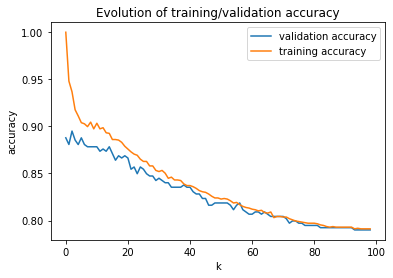

In [17]:
test_scores = grid.cv_results_['mean_test_score']
train_scores = grid.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='validation accuracy')
plt.plot(train_scores, label='training accuracy')
plt.ylabel("accuracy")
plt.xlabel("k")
plt.title("Evolution of training/validation accuracy")
plt.legend()
plt.show()

_Observation: With increasing number of neighbours, accuracy is decreasing._

## Task 2: Report & Matrix

Provide a classification report and visualize the confusion matrix of the test dataset

In [19]:
from sklearn.metrics import classification_report

# Classification report
y_te_preds = grid.predict(te_features)
print(classification_report(y_true=te_batch_labels, y_pred=y_te_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.92      1.00      0.96        11
         2.0       0.90      1.00      0.95         9
         3.0       1.00      0.83      0.91         6
         4.0       0.88      1.00      0.93         7
         5.0       1.00      0.60      0.75         5

    accuracy                           0.94        50
   macro avg       0.95      0.91      0.92        50
weighted avg       0.95      0.94      0.94        50



_Oberservation: The recall value is 100% for Bikes, Motorcycles and Trucks. That means, whenever a pictures is predicted to be a bike, it truly is a bike. Cars have a recall value close to 90%, vans close to 80%. The lowest recall values are for the category "others". The k-NN estimator only detected 67% of the category "other"._

/Users/tabea-retina/opt/anaconda3/envs/adsml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


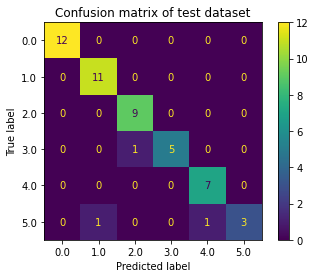

In [20]:
# import command
from sklearn.metrics import plot_confusion_matrix

#plot confusion matrix
plot_confusion_matrix(grid,te_features, te_batch_labels,values_format='d' )
plt.title('Confusion matrix of test dataset')
plt.show()

## Taks 3: Neighbors correctly classified
Pick an image which was correctly classified in the test set and plot its 10 nearest neighbors from the training set.

In [21]:
# Predictions for test data
predicted = grid.predict(te_features)

In [22]:
# predicted labels
predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 2., 3., 4., 4., 4., 4., 4., 4., 4., 5., 1., 4., 5., 5.],
      dtype=float32)

In [23]:
# actual labels
te_batch_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5.],
      dtype=float32)

In [24]:
# pick a correctly classified image
cor_classified = te_features[0]
cor_classified

array([0.29145142, 0.22876775, 0.07972701, ..., 0.        , 0.        ,
       0.7106314 ], dtype=float32)

In [25]:
# import command
from sklearn.neighbors import NearestNeighbors

# 10 nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(tr_features)
cor_classified_neighbors =neigh.kneighbors([cor_classified])
print(cor_classified_neighbors)

(array([[10.628411, 11.243441, 11.845208, 11.901092, 12.900651, 12.982115,
        13.028144, 13.214293, 13.225893, 13.26839 ]], dtype=float32), array([[26, 10, 22, 61, 17, 18, 30, 15, 59, 16]]))


_Observation: The first array of numbers are distances which are between 10 an 13. The secons array of numbers are the indexes._

In [26]:
# Convert into Numpy array
imgs= np.array(tr_batch_imgs)
imgs.shape

(1, 280, 224, 224, 3)

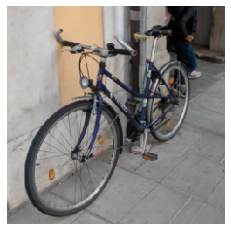

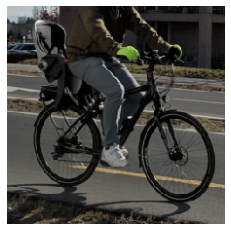

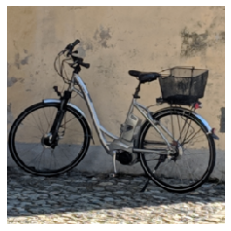

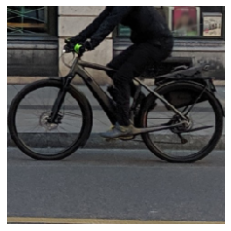

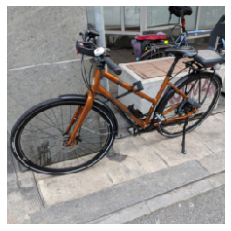

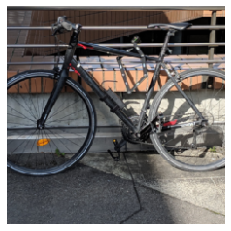

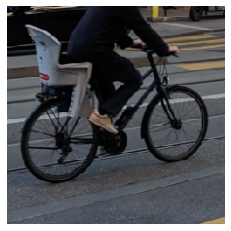

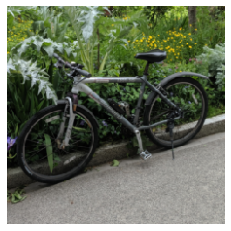

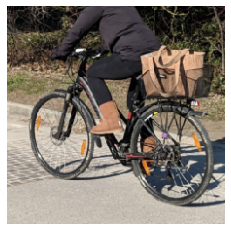

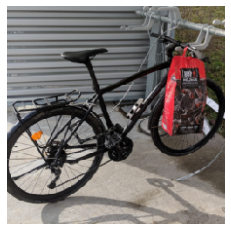

In [27]:
# 10 nearest neighbors
files = [imgs[:,26,:, :,],imgs[:,10,:, :,],imgs[:,22,:, :,],imgs[:,61,:, :,],imgs[:,17,:, :,],
         imgs[:,18,:, :,],imgs[:,30,:, :,],imgs[:,15,:, :,],imgs[:,59,:, :,],imgs[:,16,:, :,]]

# Feature matrix
features = []

for file in files:
    # Convert it into a Numpy array
    img = np.array(file)
    
    # Flatten the array
    flat_img = img.flatten()
    
    # Reshape the images
    img_reshape = flat_img.reshape(224, 224, 3)

    # Add them to the feature matrix
    features.append(img_reshape)
    
    # Plot the images
    plt.imshow(img_reshape)
    plt.axis('off')
    plt.show()

## Taks 4: Neighbors misclassified

Pick an image which was misclassified in the test set and plot its 10 neighbors from the training set.

In [28]:
# Pick a misclassified image
misclassified = te_features[46]
misclassified

array([0.5316204 , 0.42711866, 0.02783642, ..., 0.0989915 , 1.1832745 ,
       0.        ], dtype=float32)

In [29]:
# 10 nearest neighbors
misclassified_neighbors =neigh.kneighbors([misclassified])
print(misclassified_neighbors)

(array([[15.090306, 15.100471, 15.426354, 15.533631, 15.850008, 16.273308,
        16.299555, 16.382414, 16.412395, 16.603672]], dtype=float32), array([[128,  90, 270, 103, 119, 106,  76, 117,  72,  81]]))


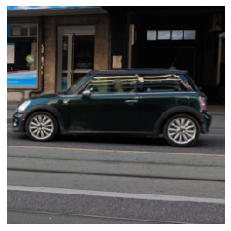

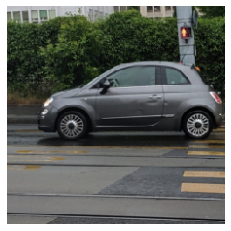

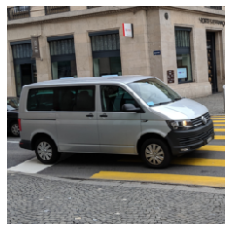

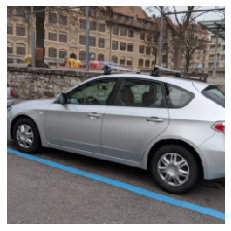

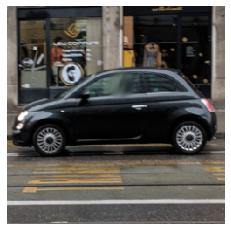

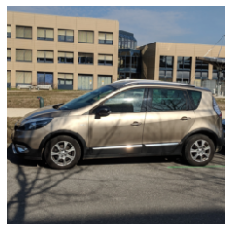

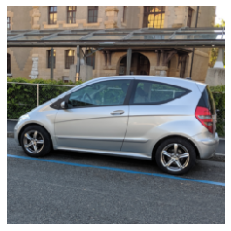

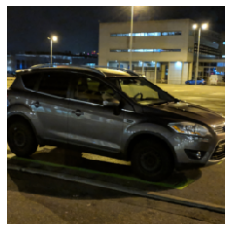

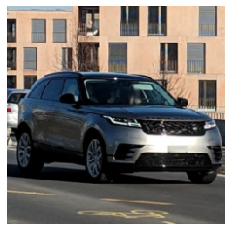

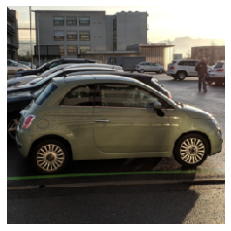

In [30]:
# 10 nearest neighbors
files = [imgs[:,128,:, :,],imgs[:,90,:, :,],imgs[:,270,:, :,],imgs[:,103,:, :,],imgs[:,119,:, :,],
         imgs[:,106,:, :,],imgs[:,76,:, :,],imgs[:,117,:, :,],imgs[:,72,:, :,],imgs[:,81,:, :,]]

# Feature matrix
features = []

for file in files:
    # Convert it into a Numpy array
    img = np.array(file)
    
    # Flatten the array
    flat_img = img.flatten()
    
    # Reshape the images
    img_reshape = flat_img.reshape(224, 224, 3)

    # Add them to the feature matrix
    features.append(img_reshape)
    
    # Plot the images
    plt.imshow(img_reshape)
    plt.axis('off')
    plt.show()